## Boring Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
from conf import LisaLogging
LisaLogging.setup()
logging.getLogger('Trace').setLevel(logging.ERROR)

import json
import os
import trappy
from trace import Trace
from executor import Executor

import numpy as np
import pandas as pd

from bart.common.Utils import select_window, area_under_curve

from trappy.stats.Topology import Topology

from perf_analysis import PerfAnalysis

2016-11-30 15:24:56,570 INFO    : root         : Using LISA logging configuration:
2016-11-30 15:24:56,571 INFO    : root         :   /home/vagrant/lisa/logging.conf


In [2]:
from trappy import ILinePlot


In [3]:
from tests.eas.generic import EnergyModelWakeMigration

In [4]:
events = [
            "sched_overutilized",
            "sched_migrate_task",
            "sched_load_avg_task",
            "sched_load_avg_cpu",
            "sched_switch",
            "cpu_idle",
            "cpu_frequency",
            "irq*"
        ]

## Running Workload

In [5]:
t = EnergyModelWakeMigration(methodName="test_task_placement")

In [6]:
t.setUpClass()

2016-11-30 15:24:57,498 INFO    : LisaTest     : Setup tests execution engine...
2016-11-30 15:24:57,499 INFO    : TestEnv      : Using base path: /vagrant
2016-11-30 15:24:57,501 INFO    : TestEnv      : Loading default (file) target configuration
2016-11-30 15:24:57,502 INFO    : TestEnv      : Loading target configuration [/vagrant/target.config]...
2016-11-30 15:24:57,503 DEBUG   : JsonConf     : loading JSON...
2016-11-30 15:24:57,506 DEBUG   : JsonConf     : Loaded JSON configuration:
2016-11-30 15:24:57,507 DEBUG   : JsonConf     :    {u'username': u'brendan', u'rtapp-calib': {u'1': 138, u'0': 354, u'3': 363, u'2': 138, u'5': 357, u'4': 355}, u'modules': [u'cpuidle'], u'platform': u'linux', u'host': u'192.168.2.2', u'board': u'juno', u'exclude_modules': [u'hwmon'], u'__features__': u'no-kernel no-reboot', u'tftp': {u'kernel': u'kern.bin', u'folder': u'/var/lib/tftpboot', u'dtb': u'dtb.bin'}, u'password': u'password', u'tools': []}
2016-11-30 15:24:57,508 DEBUG   : TestEnv      :

2016-11-30 15:25:28,975 DEBUG   : Workload     : Callback [postrun]...
2016-11-30 15:25:28,979 DEBUG   : Workload     : Pulling logfiles to [/vagrant/results/20161130_152510/rtapp:energy_aware:wake_migration/1]...
2016-11-30 15:25:28,982 DEBUG   : ssh          : /usr/bin/scp -r   brendan@192.168.2.2:'/home/brendan/devlib-target/run_dir/*task_wmig0*.log' /vagrant/results/20161130_152510/rtapp:energy_aware:wake_migration/1
2016-11-30 15:25:29,173 DEBUG   : ssh          : /usr/bin/scp -r   brendan@192.168.2.2:'/home/brendan/devlib-target/run_dir/*task_wmig1*.log' /vagrant/results/20161130_152510/rtapp:energy_aware:wake_migration/1
2016-11-30 15:25:29,389 DEBUG   : Workload     : Pulling JSON to [/vagrant/results/20161130_152510/rtapp:energy_aware:wake_migration/1]...
2016-11-30 15:25:29,394 DEBUG   : ssh          : /usr/bin/scp -r   brendan@192.168.2.2:/home/brendan/devlib-target/run_dir/wake_migration_00.json /vagrant/results/20161130_152510/rtapp:energy_aware:wake_migration/1
2016-11-30

In [7]:
experiment = t.executor.experiments[0]

In [8]:
utils = t.get_task_utils_df(experiment)

2016-11-30 15:25:35,801 DEBUG   : Analysis     : Analysis: /home/vagrant/lisa/libs/utils/analysis
2016-11-30 15:25:35,803 DEBUG   : Analysis     : Syspath: ['/home/vagrant/lisa/libs/utils/analysis', '', '/home/vagrant/lisa/libs/bart', '/home/vagrant/lisa/libs/trappy', '/home/vagrant/lisa/libs/devlib', '/home/vagrant/lisa', '/home/vagrant/lisa/libs/wlgen', '/home/vagrant/lisa/libs/utils', '/vagrant/ipynb/tests', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages/PILcompat', '/usr/lib/python2.7/dist-packages/gtk-2.0', '/usr/lib/pymodules/python2.7', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/vagrant/.ipython']
2016-11-30 15:25:35,804 INFO    : Analysis     : Registering trace analysis modules:
2016-11-30 15:25:35,806 DEBUG   : Analysis     : Filen

In [9]:
cpus = t.get_task_cpu_df(experiment)

2016-11-30 15:25:36,072 DEBUG   : Analysis     : Analysis: /home/vagrant/lisa/libs/utils/analysis
2016-11-30 15:25:36,073 DEBUG   : Analysis     : Syspath: ['/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '', '/home/vagrant/lisa/libs/bart', '/home/vagrant/lisa/libs/trappy', '/home/vagrant/lisa/libs/devlib', '/home/vagrant/lisa', '/home/vagrant/lisa/libs/wlgen', '/home/vagrant/lisa/libs/utils', '/vagrant/ipynb/tests', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages/PILcompat', '/usr/lib/python2.7/dist-packages/gtk-2.0', '/usr/lib/pymodules/python2.7', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/vagrant/.ipython']
2016-11-30 15:25:36,075 INFO    : Analysis     : Registering trace analysis modules:
2016-11-30 1

In [10]:
estimated_power = t.get_power_df(experiment)

2016-11-30 15:25:36,276 DEBUG   : Analysis     : Analysis: /home/vagrant/lisa/libs/utils/analysis
2016-11-30 15:25:36,278 DEBUG   : Analysis     : Syspath: ['/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '', '/home/vagrant/lisa/libs/bart', '/home/vagrant/lisa/libs/trappy', '/home/vagrant/lisa/libs/devlib', '/home/vagrant/lisa', '/home/vagrant/lisa/libs/wlgen', '/home/vagrant/lisa/libs/utils', '/vagrant/ipynb/tests', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages/PILcompat', '/usr/lib/python2.7/dist-packages/gtk-2.0', '/usr/lib/pymodules/python2.7', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/vagrant/.ipython']
2016-11-30 15:25:36,282 INFO    : Analysis     : Regist

In [18]:
expected_power = t.get_expected_power_df(experiment)

2016-11-30 15:27:06,553 INFO    : root         :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-11-30 15:27:06,557 INFO    : root         :    EnergyModel - Done
2016-11-30 15:27:06,561 INFO    : root         :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-11-30 15:27:06,565 INFO    : root         :    EnergyModel - Done
2016-11-30 15:27:06,567 INFO    : root         :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-11-30 15:27:06,570 INFO    : root         :    EnergyModel - Done
2016-11-30 15:27:06,574 INFO    : root         :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-11-30 15:27:06,578 INFO    : root         :    EnergyModel - Done
2016-11-30 15:27:06,580 INFO    : root         :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-11-30 15:27:06,584 INFO    : root         :    EnergyModel - Done
2016-11-30 15:27:06,586 I

## Plot Schedule

In [12]:
trace = t.get_trace(experiment)

trappy.plotter.plot_trace(trace.ftrace)

2016-11-30 15:25:36,594 DEBUG   : Analysis     : Analysis: /home/vagrant/lisa/libs/utils/analysis
2016-11-30 15:25:36,595 DEBUG   : Analysis     : Syspath: ['/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '/home/vagrant/lisa/libs/utils/analysis', '', '/home/vagrant/lisa/libs/bart', '/home/vagrant/lisa/libs/trappy', '/home/vagrant/lisa/libs/devlib', '/home/vagrant/lisa', '/home/vagrant/lisa/libs/wlgen', '/home/vagrant/lisa/libs/utils', '/vagrant/ipynb/tests', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages/PILcompat', '/usr/lib/python2.7/dist-packages/gtk-2.0', '/usr/lib/pymodules/python2.7', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/vagrant/.ipython']
2016-11-30 15

In [47]:
df = pd.concat([expected_power, estimated_power], axis=1).fillna(method='ffill')
df = df['power']

df.columns = ['expected', 'estimated']

ILinePlot(df, column=df.columns.tolist(), drawstyle='steps-post').view()

""
""


## Find which resources over-used energy

Sum the energy used by each component over the period of workload execution.

In [20]:
df = expected_power
window = t.get_window(experiment)
estimated = {}
for column in df.columns:
    estimated[column] = area_under_curve(df[column]) / (window[1] - window[0])

# estimated["power"] should be the some of the other values (w/ rounding errors)
assert (estimated["power"] - (sum(estimated.values()) - estimated["power"])) < 0.1

print("Average estimated system power: %s bogo-Watts" % estimated["power"])

Average estimated system power: 286.459655872 bogo-Watts


Get expected (ideal) energy usage

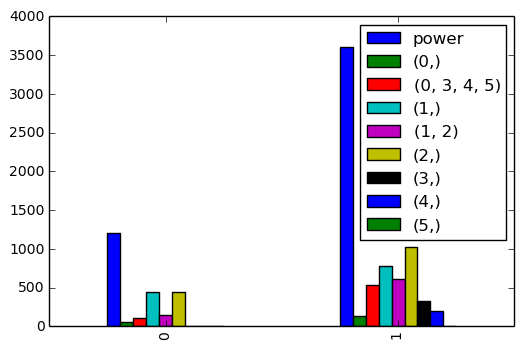

In [35]:
pd.DataFrame([expected_power.sum().to_dict(), estimated_power.sum().to_dict()]).plot(kind='bar', sharex=True)

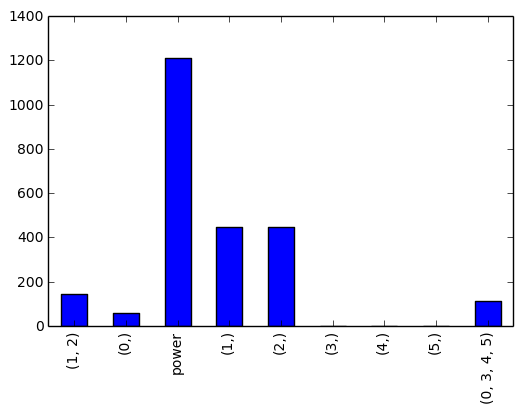

In [29]:
expected_power.sum().plot(kind='bar')

In [21]:
def task_capacity(task):
    # Must be a single-phase task
    [phase] = rtapp_params[task]["phases"].values()
    return (phase["run"] / float(phase["timer"]["period"]) * energy_model.capacity_scale)

capacities = {t: task_capacity(t) for t in tasks}
_, utils = energy_model._find_optimal_placements(capacities)

NameError: name 'tasks' is not defined

In [ ]:
def distance_sq(a, b):
    # Return the square of the distance between two n-dimensional points
    return sum([(ai - bi) ** 2 for ai, bi in zip(a, b)])


In [ ]:
estimated = estimated_power.sum().to_dict()

def distance_sq(a, b):
    # Return the square of the distance between two n-dimensional points
    return sum([(ai - bi) ** 2 for ai, bi in zip(a, b)])
def distance_from_observed(util):
    keys = estimated.keys()
    power = energy_model.estimate_from_cpu_util(util, combine=True)
    return distance_sq([power[k] for k in keys], [estimated[k] for k in keys])

# Find the utilization distribution (task placement) that would give the most similar energy profile to the one observed
utils
util = min(utils, key=distance_from_observed)
print util
expected = energy_model.estimate_from_cpu_util(util, combine=True)

In [ ]:
expected_old = {'power': 139.76043360433604,
 (0,): 0.0,
 (0, 1, 2, 3): 63.708943089430896,
 (1,): 0.0,
 (2,): 0.0,
 (3,): 76.05149051490514,
 (4,): 0.0,
 (4, 5, 6, 7): 0.0,
 (5,): 0.0,
 (6,): 0.0,
 (7,): 0.0}

In [ ]:
energy_model.estimate_from_cpu_util(util)

Show how much extra energy each component seemed to use

In [ ]:
def df_for_graph(power):
    # Convert a dict to a DataFrame that can be used to display a bar graph
    # Order the bars by key length - so CPU-level numbers are first, then cluster numbers, then the total ("power")
    items = sorted(power.items(), key=lambda (k, v): len(k))
    [keys, vals] = zip(*items)
    return pd.DataFrame(list(vals), index=list(keys))

assert estimated.keys() == expected.keys()

df_exp = df_for_graph(expected)
df_est = df_for_graph(estimated)

df = pd.concat([df_exp, df_est], axis=1, join_axes=[df_exp.index])
df.columns = ["expected", "estimated"]
df.plot(kind="bar")

In [ ]:
trace.analysis.cpus.plotCPU()

In [ ]:
trace.analysis.frequency.plotClusterFrequencies()

In [ ]:
trace.analysis.cpus.plotCPU()

In [ ]:
trace.analysis.idle.plotClusterIdleStateResidency()
trace.analysis.idle.plotCPUIdleStateResidency()